In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from collections import Counter
import pandas as pd

import plotly.express as px
from plotly.offline import init_notebook_mode
from wordcloud import WordCloud , ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the data into a pandas dataframe
df = pd.read_csv('Tamil_Cuisine_Analysis.csv')

In [5]:
df.head()

,recipe_name,ingredients,cooking_time,servings,difficulty,meal_type,cuisine,equipment,method,calories,fat,protein,carbohydrates,taste_flavorprofile,diet
0,chettinad chicken curry,"500 g chicken, 2 onions, 2 tomatoes, 2 green c...",40 minutes,4,medium,main dish,chettinad,"pressure cooker or pan, spatula, blender or gr...","marinate chicken, cook with onions, tomatoes, ...",300,15,30,10,"spicy, savory",non-vegetarian
1,chettinad pepper chicken,"500 g chicken, 2 onions, 2 tomatoes, 1 inch gi...",40 minutes,4,medium,main dish,chettinad,"pressure cooker or pan, spatula","marinate chicken, cook with onions, tomatoes, ...",250,12,25,8,"spicy, peppery, savory",non-vegetarian
2,chettinad fish fry,"500 g fish, 2 tsp red chili powder, 1 tsp turm...",30 minutes,4,easy,appetizer or side dish,chettinad,"pan, spatula","marinate fish with spices and lemon juice, and...",200,10,20,5,"spicy, tangy, crispy",non-vegetarian
3,chettinad mutton curry,"500 g mutton, 2 onions, 2 tomatoes, 2 green ch...",1 hour,4,hard,main dish,chettinad,"pressure cooker or pan, spatula","marinate mutton, cook with onions, tomatoes, g...",400,25,40,10,"spicy, savory",non-vegetarian
4,chettinad egg curry,"6 boiled eggs, 2 onions, 2 tomatoes, 2 green c...",30 minutes,4,easy,main dish,chettinad,"pan, spatula","heat oil in a pan and add fennel seeds, cumin ...",230,17,8,10,"spicy, flavourful, creamy",non-vegetarian


In [6]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def nlp_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(w) for w in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Remove short words
    tokens = [w for w in tokens if len(w) > 2]

    # Join the tokens back into a string
    text = " ".join(tokens)

    return text


# Exploratory Data Analysis

EDA is the process of examining and analyzing data sets to summarize their main characteristics.

1) Ingredient analysis: Analysing the ingredients that are unique to Tamil cuisine.

2) Method Analysis: Analysing the various methods in Tamil Cuisine.

3) Equipment analysis: The most commonly used cooking equipment in Tamil cuisine, such as pressure cookers, griddles, and kadai.

4) Taste/flavor profile analysis: The most common taste/flavor profiles in Tamil cuisine, such as sweet, spicy, sour, salty, tangy etc.,

5) Meal type analysis: The different meal types in Tamil cuisine, such as breakfast, lunch, dinner, and snacks.

6) Difficulty level analysis: The difficulty level of different Tamil cuisine recipes, such as easy, medium, and hard.

7) Nutritional analysis: The nutritional content of Tamil cuisine dishes, such as their calorie count, fat content, protein content, and carbohydrate content.

## 1) Ingredient Analysis

In [7]:
ingredients=[]
for i in df["ingredients"]:
        x=nlp_preprocessing(i)
        s=x.split()
        for j in s:
            m=nlp_preprocessing(j)
            ingredients.append(m)
print(ingredients)

['chicken', 'onion', 'tomato', 'green', 'chili', 'inch', 'ginger', 'clove', 'garlic', 'tsp', 'turmeric', 'powder', 'tbsp', 'oil', 'salt', 'taste', 'curry', 'leaf', 'coriander', 'leaf', 'garnish', 'chicken', 'onion', 'tomato', 'inch', 'ginger', 'garlic', 'clove', 'tsp', 'turmeric', 'powder', 'tsp', 'black', 'pepper', 'powder', 'tbsp', 'oil', 'salt', 'taste', 'curry', 'leaf', 'garnish', 'fish', 'tsp', 'red', 'chili', 'powder', 'tsp', 'turmeric', 'powder', 'tsp', 'coriander', 'powder', 'tsp', 'cumin', 'powder', 'tsp', 'fennel', 'powder', 'tsp', 'pepper', 'powder', 'tbsp', 'oil', 'salt', 'taste', 'lemon', 'juice', 'garnish', 'mutton', 'onion', 'tomato', 'green', 'chili', 'inch', 'ginger', 'clove', 'garlic', 'tsp', 'turmeric', 'powder', 'tbsp', 'oil', 'salt', 'taste', 'curry', 'leaf', 'coriander', 'leaf', 'garnish', 'boiled', 'egg', 'onion', 'tomato', 'green', 'chili', 'inch', 'ginger', 'clove', 'garlic', 'tsp', 'turmeric', 'powder', 'tbsp', 'oil', 'salt', 'taste', 'curry', 'leaf', 'coriand

In [8]:
print("Wordcount on Ingredients Column")

# Assuming that `method` is a list of words
word_counts = Counter(ingredients)

# Convert the counter to a list of tuples
counts_list = list(word_counts.items())

# Sort the list of tuples based on the count in descending order
counts_list.sort(key=lambda x: x[1], reverse=True)

# Print the sorted counts
for word, count in counts_list:
    wc=f"{word}: {count}"
    print(wc)


Wordcount on Ingredients Column
tsp: 167
powder: 128
seed: 92
cup: 85
leaf: 76
salt: 74
oil: 65
coriander: 58
tbsp: 56
dal: 54
turmeric: 48
chili: 46
onion: 45
cumin: 41
tomato: 38
green: 37
curry: 37
garlic: 36
taste: 34
red: 34
ginger: 30
rice: 30
mustard: 30
coconut: 27
water: 27
urad: 23
paste: 20
chilies: 19
clove: 18
tamarind: 18
chana: 17
garnish: 16
grated: 16
chilli: 16
inch: 15
chopped: 15
fennel: 14
cardamom: 12
milk: 11
jaggery: 11
flour: 11
ghee: 11
cashew: 11
fenugreek: 10
chicken: 8
toor: 8
frying: 8
sprig: 8
fresh: 8
needed: 7
masala: 7
raisin: 7
per: 7
batter: 6
dried: 6
vegetable: 6
sugar: 6
gingergarlic: 6
dry: 6
pepper: 5
fish: 5
lemon: 5
mutton: 5
carrot: 5
potato: 5
asafoetida: 5
mixed: 5
sambar: 5
gram: 5
garam: 5
juice: 4
idli: 4
small: 4
drumstick: 4
pinch: 4
banana: 4
methi: 4
chutney: 3
piece: 3
shallot: 3
dosai: 3
saffron: 3
raw: 3
bean: 3
pea: 3
moong: 3
nut: 3
curd: 3
basmati: 3
mint: 3
cinnamon: 3
bay: 3
black: 2
boiled: 2
egg: 2
whole: 2
almond: 2
minced

#### NOTE
In Python, a set is an unordered collection of unique elements. It is similar to a list or a tuple, but unlike those data types, a set cannot contain duplicate elements.

In [9]:
unique_ingredients = list(set(ingredients))
print("The most used ingredients in Tamil Cuisine")
print((unique_ingredients))

The most used ingredients in Tamil Cuisine
['paneer', 'egg', 'millet', 'buttermilk', 'poha', 'lamb', 'blossom', 'palm', 'vazhai', 'cooked', 'ginger', 'pinch', 'sprig', 'tomato', 'berry', 'mango', 'plantain', 'lemon', 'raw', 'nut', 'fennel', 'eggplant', 'coriander', 'flower', 'dosa', 'mutton', 'powder', 'extract', 'dry', 'tamarind', 'garnish', 'poriyal', 'cinnamon', 'steaming', 'cauliflower', 'chopped', 'raisin', 'dosai', 'brinjal', 'red', 'chilli', 'cottonseed', 'piece', 'salt', 'curd', 'papad', 'drumstick', 'ghee', 'turkey', 'milk', 'yam', 'strand', 'curry', 'small', 'slit', 'per', 'mashed', 'mint', 'vazhaipoo', 'kootu', 'onion', 'cumin', 'chilies', 'boiled', 'batter', 'poppy', 'fish', 'sesame', 'spinach', 'potato', 'basmati', 'turmeric', 'channa', 'pea', 'crab', 'ring', 'methi', 'baking', 'banana', 'vegetable', 'deep', 'roasted', 'dal', 'needed', 'paste', 'grated', 'rice', 'leaf', 'fresh', 'sugar', 'pepper', 'shallot', 'gram', 'saffron', 'almond', 'seed', 'besan', 'masala', 'inch', '

In [10]:
Authentic_Tamil_Ingredients = ['karupatti', 'vazhai', 'vazhaipoo', 'poo', 'nannari']
print("The Authentic Tamil Ingredients are")
for i in Authentic_Tamil_Ingredients:
    print(i)

The Authentic Tamil Ingredients are
karupatti
vazhai
vazhaipoo
poo
nannari


### Visualization using wordcloud

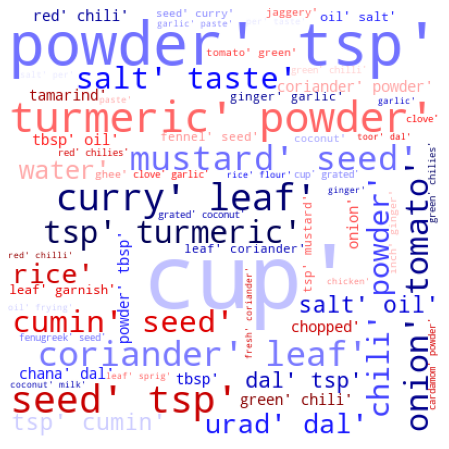

In [11]:
text=str(ingredients)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'seismic'
                      ,background_color ='white', 
                min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

## 2) Method Analysis

In [12]:
method=[]
for i in df["method"]:
        x=nlp_preprocessing(i)
        s=x.split()
        for j in s:
            m=nlp_preprocessing(j)
            method.append(m)
print(method)

['marinate', 'chicken', 'cook', 'onion', 'tomato', 'ginger', 'garlic', 'spice', 'garnish', 'curry', 'leaf', 'coriander', 'leaf', 'serving', 'marinate', 'chicken', 'cook', 'onion', 'tomato', 'ginger', 'garlic', 'spice', 'garnish', 'curry', 'leaf', 'serving', 'marinate', 'fish', 'spice', 'lemon', 'juice', 'fry', 'oil', 'golden', 'brown', 'serve', 'hot', 'marinate', 'mutton', 'cook', 'onion', 'tomato', 'ginger', 'garlic', 'spice', 'garnish', 'curry', 'leaf', 'coriander', 'leaf', 'serving', 'heat', 'oil', 'pan', 'add', 'fennel', 'seed', 'cumin', 'seed', 'green', 'chilies', 'add', 'onion', 'sauté', 'golden', 'brown', 'add', 'ginger', 'garlic', 'paste', 'sauté', 'minute', 'add', 'tomato', 'cook', 'turn', 'mushy', 'add', 'coriander', 'powder', 'turmeric', 'powder', 'red', 'chili', 'powder', 'garam', 'masala', 'powder', 'salt', 'mix', 'well', 'cook', 'minute', 'add', 'coconut', 'milk', 'mix', 'well', 'add', 'hardboiled', 'egg', 'cook', 'minute', 'garnish', 'coriander', 'leaf', 'serve', 'hot', 

In [13]:
from collections import Counter
print("Wordcount on method column")

# Assuming that `method` is a list of words
word_counts = Counter(method)

# Convert the counter to a list of tuples
counts_list = list(word_counts.items())

# Sort the list of tuples based on the count in descending order
counts_list.sort(key=lambda x: x[1], reverse=True)

# Print the sorted counts
for word, count in counts_list:
    print(f"{word}: {count}")


Wordcount on method column
add: 194
cook: 82
powder: 78
rice: 77
water: 73
minute: 72
serve: 68
heat: 62
leaf: 57
pan: 55
seed: 54
dal: 53
onion: 51
mix: 50
oil: 49
salt: 49
hot: 48
chopped: 46
turn: 44
fry: 36
tomato: 35
paste: 35
coriander: 34
well: 34
chili: 33
garlic: 32
soak: 32
saute: 32
turmeric: 30
coconut: 30
spice: 29
brown: 29
grind: 29
ginger: 28
curry: 27
garnish: 26
golden: 26
green: 26
batter: 26
mixture: 26
mustard: 24
tamarind: 22
cumin: 21
let: 21
cooked: 20
chicken: 19
red: 18
pot: 18
smooth: 16
boil: 16
milk: 15
grated: 15
simmer: 15
translucent: 14
pressure: 14
cup: 14
cashew: 14
jaggery: 14
serving: 13
hour: 13
marinate: 12
mushy: 12
blend: 12
cardamom: 12
ghee: 12
urad: 12
make: 11
sambar: 11
cool: 11
toor: 11
soft: 11
chilli: 11
shape: 10
raisin: 10
juice: 9
vegetable: 9
chutney: 9
pour: 9
cooker: 9
soaked: 9
chana: 9
small: 9
piece: 9
fennel: 8
chilies: 8
sauté: 8
flour: 8
start: 8
cover: 8
tender: 8
drain: 8
idli: 8
mutton: 7
ferment: 7
fenugreek: 7
steamed: 7

In [14]:
unique_data = list(set(method))
print("The various methods in Tamil Cuisine." )
print((unique_data))

The various methods in Tamil Cuisine.
['masiyal', 'pinch', 'let', 'edge', 'flame', 'thogayal', 'plantain', 'drain', 'nut', 'fennel', 'coriander', 'center', 'inside', 'turn', 'bajjis', 'garnish', 'top', 'away', 'separate', 'bowl', 'thenga', 'kcal', 'stock', 'drumstick', 'tray', 'peel', 'turkey', 'milk', 'kootu', 'boiled', 'onto', 'sesame', 'soup', 'steamer', 'desired', 'sadham', 'cooking', 'dal', 'remove', 'slice', 'steamed', 'unique', 'fresh', 'charred', 'spread', 'nonstick', 'peeled', 'shallot', 'mixture', 'refrigerator', 'cool', 'evenly', 'line', 'spoonful', 'skillet', 'melt', 'mold', 'thick', 'splutter', 'moong', 'chana', 'frying', 'pearl', 'vadas', 'second', 'gravy', 'water', 'bring', 'wash', 'thickens', 'well', 'sambar', 'stove', 'marinate', 'horse', 'till', 'gingergarlic', 'naturally', 'garam', 'coated', 'crispy', 'absorbed', 'shape', 'crackle', 'mushy', 'dosas', 'green', 'pulp', 'coconut', 'set', 'chili', 'slightly', 'ground', 'brown', 'blender', 'medium', 'prawn', 'arisi', 'bla

In [15]:
most_commonly_used_Methods = ['strain', 'dried', 'extract',  'boiled', 'oven', 'mixed', 'separate', 'place', 'soak',  
                        'thattu', 'grease', 'flavor', 'top', 'center', 'peel', 'ice', 'clean', 'blend',  'juice',
                        'rest', 'frying', 'clear', 'batter', 'ball',  'paste', 'swirl', 'fry',  'seasoning', 'spread',
                        'let', 'gently', 'cooked', 'cold', 'drained', 'slit', 'pinch', 'liquid', 'wet', 'fold', 'pop',
                        'cleaned', 'serving', 'scrambled', 'stir', 'soaked', 'mold', 'translucent', 'add', 'refrigerator', 
                        'smell', 'mixture', 'simmer', 'separately', 'leave', 'thenga', 'soft', 'ground', 'chop', 'scoop',  
                        'drop', 'peeled', 'make', 'chopped',  'cut', 'cool', 'mixing', 'preheat','mash', 'steam', 'cook', 
                        'chilled', 'greased','running', 'ladle', 'allow', 'inside', 'aside', 'opaque', 'cup', 'charred',  
                        'crushed', 'tempered', 'piece', 'needed',  'mushy', 'low', 'crackle', 'continue', 'ladleful', 'grated',
                        'remove', 'mould', 'away', 'grind', 'sit', 'wedge', 'tender', 'form', 'smooth',  'sauté','overnight', 
                        'minced', 'bring', 'adding', 'thickens', 'set', 'ratio', 'taste', 'fill',  'fried', 'rinse', 'edge', 
                        'crumbly', 'slightly', 'filling', 'ferment', 'stock', 'evenly', 'heat', 'flat', 'medium', 'spoonful',
                        'pulp', 'chill', 'patty', 'release', 'put', 'keera', 'mix', 'raw', 'wash',  'season',  'cover', 'drain',
                        'desired','layer', 'cooking', 'steamed', 'garnish', 'boil',  'baking', 'roasted', 'reduce', 'puttu', 
                        'disc', 'tempering', 'turn', 'marinate', 'roast', 'coarse', 'marinated', 'light', 'absorbed', 'melted',
                        'flatten', 'griddle', 'melt', 'slice', 'keep', 'pressure', 'flip', 'squeeze', 'deep', 'mashed', 
                        'spluttering', 'hardboiled', 'fine', 'pour', 'dry', 'boiling', 'press', 'powder', 'coated' ]
print("The most commonly used Methods")
for i in most_commonly_used_Methods:
    print(i)

The most commonly used Methods
strain
dried
extract
boiled
oven
mixed
separate
place
soak
thattu
grease
flavor
top
center
peel
ice
clean
blend
juice
rest
frying
clear
batter
ball
paste
swirl
fry
seasoning
spread
let
gently
cooked
cold
drained
slit
pinch
liquid
wet
fold
pop
cleaned
serving
scrambled
stir
soaked
mold
translucent
add
refrigerator
smell
mixture
simmer
separately
leave
thenga
soft
ground
chop
scoop
drop
peeled
make
chopped
cut
cool
mixing
preheat
mash
steam
cook
chilled
greased
running
ladle
allow
inside
aside
opaque
cup
charred
crushed
tempered
piece
needed
mushy
low
crackle
continue
ladleful
grated
remove
mould
away
grind
sit
wedge
tender
form
smooth
sauté
overnight
minced
bring
adding
thickens
set
ratio
taste
fill
fried
rinse
edge
crumbly
slightly
filling
ferment
stock
evenly
heat
flat
medium
spoonful
pulp
chill
patty
release
put
keera
mix
raw
wash
season
cover
drain
desired
layer
cooking
steamed
garnish
boil
baking
roasted
reduce
puttu
disc
tempering
turn
marinate
roast

### Vizualization most commonly used methods using Wordcloud 

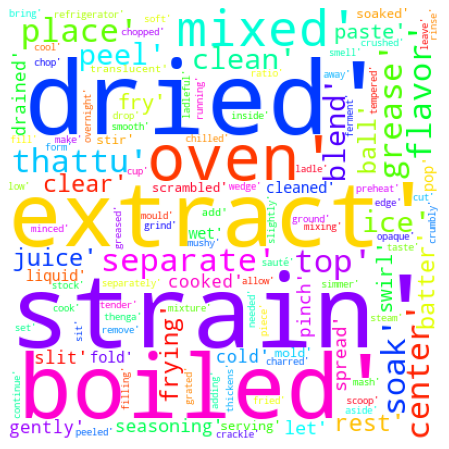

In [16]:
text=str(most_commonly_used_Methods)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'gist_rainbow'
                      ,background_color ='white', 
                min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

## 3) Equipment Analysis

In [17]:
equipment=[]
for i in df["equipment"]:
        x=nlp_preprocessing(i)
        s=x.split()
        for j in s:
            m=nlp_preprocessing(j)
            equipment.append(m)
print(equipment)

['pressure', 'cooker', 'pan', 'spatula', 'blender', 'grinder', 'pressure', 'cooker', 'pan', 'spatula', 'pan', 'spatula', 'pressure', 'cooker', 'pan', 'spatula', 'pan', 'spatula', 'pan', 'spatula', 'pan', 'spatula', 'paniyarampan', 'dosaitawa', 'spatula', 'frying', 'pan', 'grinder', 'pan', 'spatula', 'pressure', 'cooker', 'heavy', 'bottomed', 'pan', 'spatula', 'mould', 'idiyappammaker', 'steamer', 'tawa', 'ladle', 'pan', 'tawa', 'ladle', 'pan', 'tawa', 'ladle', 'pan', 'blender', 'mix', 'bowl', 'serving', 'glass', 'blender', 'steamer', 'frying', 'pan', 'frying', 'pan', 'mixing', 'bowl', 'grater', 'blender', 'kadaai', 'wok', 'frying', 'pan', 'mixing', 'bowl', 'grater', 'blender', 'kadaai', 'wok', 'pressure', 'cooker', 'large', 'pot', 'pan', 'pastry', 'bag', 'small', 'round', 'nozzle', 'frying', 'pan', 'pressure', 'cooker', 'pan', 'spatula', 'blender', 'grinder', 'heavybottomed', 'pan', 'spatula', 'strainer', 'plate', 'heavybottomed', 'pan', 'spatula', 'plate', 'pan', 'spatula', 'pressure'

In [18]:
from collections import Counter
print("Wordcount on Equipment Data")

# Assuming that `method` is a list of words
word_counts = Counter(equipment)

# Convert the counter to a list of tuples
counts_list = list(word_counts.items())

# Sort the list of tuples based on the count in descending order
counts_list.sort(key=lambda x: x[1], reverse=True)

# Print the sorted counts
for word, count in counts_list:
    print(f"{word}: {count}")


Wordcount on Equipment Data
pan: 55
pot: 29
blender: 27
spatula: 23
grinder: 20
large: 13
pressure: 12
cooker: 12
bowl: 12
stovetop: 9
mixing: 8
mixer: 8
frying: 7
kadaai: 6
steamer: 5
tawa: 5
wok: 5
ladle: 4
serving: 4
cutting: 3
board: 3
knife: 3
glass: 2
grater: 2
heavybottomed: 2
plate: 2
mortar: 2
pestle: 2
spoon: 2
dish: 2
mannpaanai: 2
idlisteamer: 2
stove: 2
paniyarampan: 1
dosaitawa: 1
heavy: 1
bottomed: 1
mould: 1
idiyappammaker: 1
mix: 1
pastry: 1
bag: 1
small: 1
round: 1
nozzle: 1
strainer: 1
appampan: 1
puttumaker: 1
banana: 1
leaf: 1
wet: 1
nonstick: 1
saucepan: 1
cheesecloth: 1
muslincloth: 1
skillet: 1
griddle: 1
slotted: 1
oven: 1


In [19]:
unique_equipments = list(set(equipment))
print("The most commonly used equipments are" )
print((unique_equipments))

The most commonly used equipments are
['ladle', 'skillet', 'pot', 'grinder', 'tawa', 'strainer', 'oven', 'dosaitawa', 'small', 'cutting', 'nozzle', 'kadaai', 'mix', 'round', 'heavybottomed', 'frying', 'glass', 'wet', 'paniyarampan', 'puttumaker', 'saucepan', 'idlisteamer', 'appampan', 'steamer', 'large', 'spoon', 'board', 'cheesecloth', 'bottomed', 'bag', 'banana', 'mixing', 'pestle', 'dish', 'slotted', 'stove', 'mannpaanai', 'pressure', 'wok', 'stovetop', 'griddle', 'plate', 'pan', 'knife', 'leaf', 'idiyappammaker', 'mortar', 'muslincloth', 'mixer', 'heavy', 'cooker', 'mould', 'blender', 'spatula', 'nonstick', 'serving', 'grater', 'pastry', 'bowl']


In [20]:
Traditional_Tamil_Equipment = ['Idiyappam Maker','Puttu Maker','kadaai','Paniyaram Pan','Dosai Tawa','Tawa','Appam pan','Idli Steamer','Mannpaanai']
print("The Traditional Tamil Equipment are")
for i in Traditional_Tamil_Equipment:
    print(i)

The Traditional Tamil Equipment are
Idiyappam Maker
Puttu Maker
kadaai
Paniyaram Pan
Dosai Tawa
Tawa
Appam pan
Idli Steamer
Mannpaanai


### Now visualize the equipments used using wordcloud

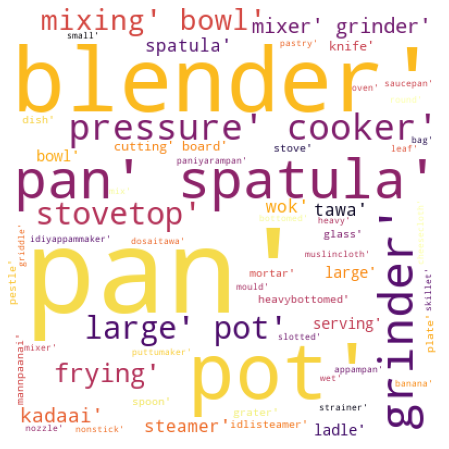

In [21]:
text=str(equipment)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'inferno'
                      ,background_color ='white', min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

## 4) Taste/flavor profile analysis 


In [22]:
taste_flavorprofile=[]
for i in df["taste_flavorprofile"]:
        x=nlp_preprocessing(i)
        s=x.split()
        for j in s:
            m=nlp_preprocessing(j)
            taste_flavorprofile.append(m)
print(taste_flavorprofile)

['spicy', 'savory', 'spicy', 'peppery', 'savory', 'spicy', 'tangy', 'crispy', 'spicy', 'savory', 'spicy', 'flavourful', 'creamy', 'spicy', 'tangy', 'savory', 'spicy', 'savory', 'soft', 'fluffy', 'savory', 'spicy', 'flavorful', 'aromatic', 'spicy', 'tangy', 'flavorful', 'sweet', 'earthy', 'neutral', 'light', 'delicate', 'spicy', 'meaty', 'spicy', 'savory', 'spicy', 'creamy', 'sweet', 'creamy', 'spicy', 'savory', 'spicy', 'meaty', 'spicy', 'tangy', 'flavorful', 'tangy', 'spicy', 'creamy', 'sweet', 'aromatic', 'flavorful', 'crispy', 'spicy', 'savory', 'tangy', 'sweet', 'rich', 'nutty', 'sweet', 'nutty', 'spicy', 'savory', 'crispy', 'tangy', 'spicy', 'flavorful', 'spicy', 'coconutty', 'spicy', 'crispy', 'coconutty', 'sweet', 'coconutty', 'coconutty', 'mild', 'sweet', 'coconutty', 'sweet', 'tangy', 'spicy', 'flavorful', 'crispy', 'savory', 'creamy', 'nutty', 'sweet', 'spicy', 'savory', 'spicy', 'aromatic', 'rich', 'creamy', 'mildly', 'spiced', 'flavorful', 'savory', 'aromatic', 'sweet', 'ar

In [23]:
from collections import Counter
print("Wordcount on Taste and Flavor Profile Data")

# Assuming that `method` is a list of words
word_counts = Counter(taste_flavorprofile)

# Convert the counter to a list of tuples
counts_list = list(word_counts.items())

# Sort the list of tuples based on the count in descending order
counts_list.sort(key=lambda x: x[1], reverse=True)

# Print the sorted counts
for word, count in counts_list:
    print(f"{word}: {count}")


Wordcount on Taste and Flavor Profile Data
spicy: 60
tangy: 29
sweet: 18
savory: 15
creamy: 15
flavorful: 15
crispy: 11
nutty: 9
coconutty: 8
aromatic: 7
mildly: 5
sour: 4
neutral: 3
mild: 3
salty: 3
flavourful: 2
soft: 2
fluffy: 2
meaty: 2
rich: 2
crunchy: 2
hint: 2
sweetness: 2
refreshing: 2
peppery: 1
earthy: 1
light: 1
delicate: 1
spiced: 1
flavorfu: 1
tasty: 1
savoury: 1
sav: 1
savor: 1
savo: 1
nutt: 1
spic: 1
garlicky: 1
onion: 1


In [24]:
unique_taste_flavors = list(set(taste_flavorprofile))
print("The most common taste/flavor profiles in Tamil cuisine," )
print(unique_taste_flavors)

The most common taste/flavor profiles in Tamil cuisine,
['creamy', 'spiced', 'neutral', 'nutt', 'savo', 'delicate', 'sour', 'tasty', 'flavorfu', 'onion', 'spicy', 'coconutty', 'mild', 'light', 'rich', 'earthy', 'sweet', 'savory', 'refreshing', 'garlicky', 'salty', 'savor', 'fluffy', 'tangy', 'nutty', 'flavorful', 'flavourful', 'crunchy', 'savoury', 'peppery', 'hint', 'sweetness', 'aromatic', 'soft', 'sav', 'crispy', 'meaty', 'mildly', 'spic']


### Vizualization using wordcloud

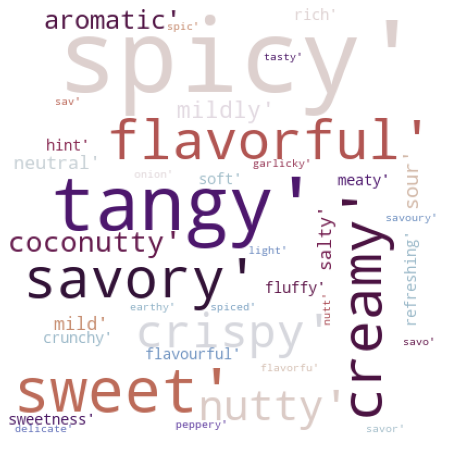

In [25]:
text=str(taste_flavorprofile)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'twilight_shifted_r'
                      ,background_color ='white', min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


## 5) Meal type analysis


In [26]:
mealtype=[]
for i in df["meal_type"]:
        x=nlp_preprocessing(i)
        s=x.split()
        #mealtype.append(s)
        for j in s:
            m=nlp_preprocessing(j)
            mealtype.append(m)
print(mealtype)

['main', 'dish', 'main', 'dish', 'appetizer', 'side', 'dish', 'main', 'dish', 'main', 'dish', 'main', 'dish', 'main', 'dish', 'snack', 'breakfast', 'main', 'dish', 'dessert', 'breakfast', 'main', 'course', 'breakfast', 'brunch', 'breakfast', 'brunch', 'breakfast', 'brunch', 'beverage', 'side', 'dish', 'snack', 'main', 'course', 'lunchdinner', 'snack', 'main', 'dish', 'dessert', 'dessert', 'main', 'course', 'main', 'course', 'main', 'dish', 'appetizer', 'breakfast', 'snack', 'breakfast', 'snack', 'dessert', 'snack', 'dessert', 'main', 'course', 'breakfast', 'snack', 'dessert', 'snack', 'main', 'dish', 'main', 'dish', 'breakfast', 'dessert', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'appetizer', 'main', 'dish', 'breakfast', 'snack', 'main', 'dish', 'main', 'dish', 'side', 'dish', 'lunchdinner', 'main', 'dish', 'main', 'dish', 'side', 'dish', 'main', 'dish', 'side', 'dish', 'main', 'dish', 'main', 'dish', 'main', 'dish', 'main', 'dish', 'dessert', 'main', 

In [27]:
mealtype=[]
for i in df["meal_type"]:
    x=nlp_preprocessing(i)
    mealtype.append(x)
print(mealtype)

['main dish', 'main dish', 'appetizer side dish', 'main dish', 'main dish', 'main dish', 'main dish', 'snack', 'breakfast', 'main dish', 'dessert', 'breakfast main course', 'breakfast brunch', 'breakfast brunch', 'breakfast brunch', 'beverage', 'side dish', 'snack', 'main course', 'lunchdinner', 'snack', 'main dish', 'dessert', 'dessert', 'main course', 'main course', 'main dish', 'appetizer', 'breakfast snack', 'breakfast', 'snack dessert', 'snack dessert', 'main course', 'breakfast snack', 'dessert', 'snack', 'main dish', 'main dish', 'breakfast', 'dessert', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'appetizer', 'main dish', 'breakfast snack', 'main dish', 'main dish', 'side dish', 'lunchdinner', 'main dish', 'main dish', 'side dish', 'main dish', 'side dish', 'main dish', 'main dish', 'main dish', 'main dish', 'dessert', 'main dish', 'snack', 'main dish', 'lunchdinner', 'breakfast', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdinner', 'lunchdi

In [28]:
from collections import Counter
print("Wordcount on Meal Type column")
Counter(mealtype)

Wordcount on Meal Type column


Counter({'main dish': 23,
         'appetizer side dish': 1,
         'snack': 10,
         'breakfast': 7,
         'dessert': 8,
         'breakfast main course': 1,
         'breakfast brunch': 3,
         'beverage': 1,
         'side dish': 12,
         'main course': 7,
         'lunchdinner': 15,
         'appetizer': 2,
         'breakfast snack': 3,
         'snack dessert': 2,
         'soup': 1})

In [29]:
unique_mealtype = list(set(mealtype))
print("The different meal types in Tamil cuisine," )
for i in unique_mealtype:
    print((i))

The different meal types in Tamil cuisine,
beverage
breakfast main course
snack
main dish
main course
appetizer
side dish
snack dessert
soup
lunchdinner
appetizer side dish
breakfast
dessert
breakfast snack
breakfast brunch


### Taste and flavors that dominates Tamil Cuisine

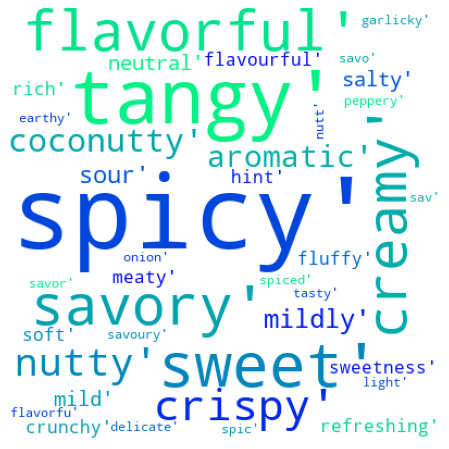

In [30]:
text=str(taste_flavorprofile)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'winter_r'
                      ,background_color ='white', min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


## 6) Difficulty level analysis


In [31]:
difficulty=[]
for i in df["difficulty"]:
        x=nlp_preprocessing(i)
        s=x.split()
        for j in s:
            m=nlp_preprocessing(j)
            difficulty.append(m)
print(difficulty)

['medium', 'medium', 'easy', 'hard', 'easy', 'medium', 'easy', 'easy', 'medium', 'medium', 'easy', 'easy', 'medium', 'medium', 'easy', 'easy', 'moderate', 'moderate', 'easy', 'easy', 'moderate', 'medium', 'medium', 'easy', 'medium', 'easy', 'medium', 'easy', 'easy', 'easy', 'easy', 'easy', 'medium', 'medium', 'medium', 'easy', 'hard', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'medium', 'medium', 'easy', 'easy', 'medium', 'easy', 'easy', 'medium', 'medium', 'easy', 'medium', 'easy', 'medium', 'easy', 'medium', 'medium', 'easy', 'medium', 'medium', 'medium', 'intermediate', 'intermediate', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'intermediate', 'easy', 'easy', 'easy', 'easy', 'medium', 'easy', 'easy', 'easy', 'easy', 'medium', 'easy', 'hard', 'medium', 'easy', 'medium', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy']


In [32]:
from collections import Counter
print("Wordcount on Taste and Flavor Profile Data")
Counter(difficulty)

Wordcount on Taste and Flavor Profile Data


Counter({'medium': 30,
         'easy': 57,
         'hard': 3,
         'moderate': 3,
         'intermediate': 3})

In [33]:
unique_difficulty = list(set(difficulty))
print("The difficulty level in different Tamil cuisine recipes," )
print((unique_difficulty))

The difficulty level in different Tamil cuisine recipes,
['hard', 'intermediate', 'medium', 'moderate', 'easy']


### Vizualization using Wordcloud

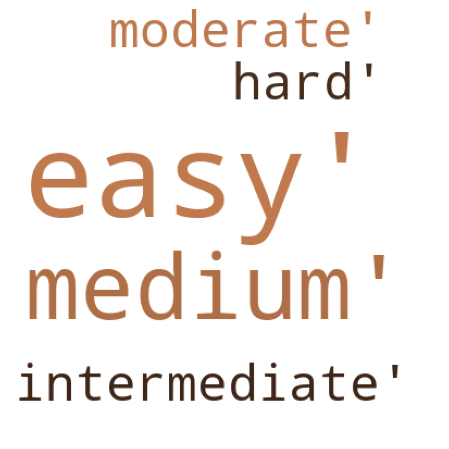

In [34]:
text=str(difficulty)

wordcloud = WordCloud(width = 400, height = 400, colormap = 'copper_r'
                      ,background_color ='white', min_font_size = 8).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# POS Tagging in Natural Language Processing

Part-of-speech (POS) tagging is a process of assigning a part of speech tag to each word in a text corpus, such as noun, verb, adjective, adverb, preposition, conjunction, and others. The POS tag indicates the syntactic category or grammatical function of the word in a sentence.

In [35]:
tag = nltk.pos_tag(unique_mealtype)
print(tag)


[('beverage', 'NN'), ('breakfast main course', 'NN'), ('snack', 'NN'), ('main dish', 'JJ'), ('main course', 'NN'), ('appetizer', 'NN'), ('side dish', 'JJ'), ('snack dessert', 'NN'), ('soup', 'NN'), ('lunchdinner', 'NN'), ('appetizer side dish', 'JJ'), ('breakfast', 'NN'), ('dessert', 'NN'), ('breakfast snack', 'NN'), ('breakfast brunch', 'NN')]


# Parsing in NLP

Parser is a technique used to analyze the grammatical structure of a sentence by assigning a syntactic structure to the words in a sentence. It involves analyzing the relationships between words to determine their role in the sentence, such as subject, object, verb, etc. Parser outputs a parse tree or a dependency tree that represents the grammatical structure of the sentence.

In [36]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)

(S
  (NP beverage/NN)
  (NP breakfast main course/NN)
  (NP snack/NN)
  (NP main dish/JJ main course/NN)
  (NP appetizer/NN)
  (NP side dish/JJ snack dessert/NN)
  (NP soup/NN)
  (NP lunchdinner/NN)
  (NP appetizer side dish/JJ breakfast/NN)
  (NP dessert/NN)
  (NP breakfast snack/NN)
  (NP breakfast brunch/NN))


### Now will draw the pattern graphically which can be seen in Noun Phrase chunking
#### NOTE
This will be opened in separate window

In [ ]:
result.draw()